## Process & Visualize USDA NASS maize data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shapereader
import shapely.affinity as shp
import datetime

In [2]:
# Read in state & county id
state_id = pd.read_csv("/home/disk/eos8/ach315/data/NASS_cropdata/stateID.txt", sep="\s+", header=None)
state_id = state_id.transpose()
state_id.columns = ["state_id"]
county_id = pd.read_csv("/home/disk/eos8/ach315/data/NASS_cropdata/countyID.txt", sep="\s+", header=None)
county_id = county_id.transpose()
county_id.columns = ["county_id"]

# Read in lat & lon information
lat_county = pd.read_csv("/home/disk/eos8/ach315/data/NASS_cropdata/lat_county.txt", sep="\s+", header=None)
lat_county = lat_county.transpose()
lat_county.columns = ["lat"]
lon_county = pd.read_csv("/home/disk/eos8/ach315/data/NASS_cropdata/lon_county.txt", sep="\s+", header=None)
lon_county = lon_county.transpose()
lon_county.columns = ["lon"]

# Read in maize yield
cornyield = pd.read_csv("/home/disk/eos8/ach315/data/NASS_cropdata/corn_yield.txt", sep="\s+", header=None)
years = np.arange(1910, 2015)
cornyield.columns = years

# Reading in maize area
cornarea = pd.read_csv("/home/disk/eos8/ach315/data/NASS_cropdata/corn_area.txt", sep="\s+", header=None)
years = np.arange(1910, 2015)
cornarea.columns = years
cornarea.head()
cornarea = cornarea.melt(var_name='year', value_name='area')
cornarea = cornarea.drop(['year'], axis=1)

# concat all info and melt dataframe
df = pd.concat([state_id, county_id, lat_county, lon_county, cornyield], axis=1)
df = pd.melt(df, id_vars=['state_id', 'county_id', 'lat', 'lon'], value_name='yield', var_name="year")
df = pd.concat([df, cornarea], axis=1)

# subsetting data for year 1961-2005
df_nass = pd.DataFrame()
years = np.arange(1961,2005)
for i in range(len(years)):
    data = df[df['year'] == years[i]]
    df_nass = pd.concat([df_nass, data])

df_nass = df_nass.reset_index(drop=True)
df_nass.year = df_nass.year.astype(int)
df_nass.head()

,state_id,county_id,lat,lon,year,yield,area
0,1.0,1.0,32.462991,-86.709691,1961,2.008560,6758.2607
1,1.0,3.0,30.787262,-87.712913,1961,2.761771,9024.5038
2,1.0,5.0,31.870087,-85.383129,1961,1.945793,11452.6210
3,1.0,7.0,33.072877,-87.112698,1961,2.259631,2092.2280
4,1.0,9.0,33.988350,-86.613622,1961,2.322398,10064.5470


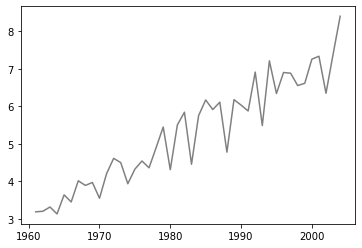

In [3]:
test = df_nass.groupby('year').mean()
plt.plot(test['yield'], c='grey')

*** Figure out max planting area in all locations across time period

In [4]:
test = df_nass.groupby(['state_id','county_id']).mean()
test

lat         lon    year     yield         area
state_id county_id                                                      
1.0      1.0        32.462991  -86.709691  1982.5  2.963197  2231.752790
         3.0        30.787262  -87.712913  1982.5  4.799671  7587.396947
         5.0        31.870087  -85.383129  1982.5  3.456884  4463.313055
         7.0        33.072877  -87.112698  1982.5  2.303269   913.049299
         9.0        33.988350  -86.613622  1982.5  4.070473  2426.921928
...                       ...         ...     ...       ...          ...
56.0     37.0       41.628676 -108.775680  1982.5       NaN          NaN
         39.0       44.203149 -110.362370  1982.5       NaN          NaN
         41.0       41.279101 -110.505440  1982.5  3.012841    80.937253
         43.0       43.895290 -107.844490  1982.5  5.820539   575.937652
         45.0       43.802767 -104.596910  1982.5  2.840928    62.726372

[3108 rows x 5 columns]

In [163]:
test = df_nass.groupby(['state_id','county_id']).max()
test

lat         lon  year     yield         area
state_id county_id                                                    
1.0      1.0        32.462991  -86.709691  2004  7.532102   6758.26070
         3.0        30.787262  -87.712913  2004  7.532102  19748.69000
         5.0        31.870087  -85.383129  2004  7.218264  11452.62100
         7.0        33.072877  -87.112698  2004  3.678176   2092.22800
         9.0        33.988350  -86.613622  2004  8.724685  10064.54700
...                       ...         ...   ...       ...          ...
56.0     37.0       41.628676 -108.775680  2004       NaN          NaN
         39.0       44.203149 -110.362370  2004       NaN          NaN
         41.0       41.279101 -110.505440  2004  4.833099    121.40588
         43.0       43.895290 -107.844490  2004  9.603430   1618.74510
         45.0       43.802767 -104.596910  2004  6.213984    161.87451

[3108 rows x 5 columns]

In [18]:
test.reset_index()

,state_id,county_id,lat,lon,year,yield,area
0,1.0,1.0,32.462991,-86.709691,1982.5,2.963197,2231.752790
1,1.0,3.0,30.787262,-87.712913,1982.5,4.799671,7587.396947
2,1.0,5.0,31.870087,-85.383129,1982.5,3.456884,4463.313055
3,1.0,7.0,33.072877,-87.112698,1982.5,2.303269,913.049299
4,1.0,9.0,33.988350,-86.613622,1982.5,4.070473,2426.921928
...,...,...,...,...,...,...,...
3103,56.0,37.0,41.628676,-108.775680,1982.5,NaN,NaN
3104,56.0,39.0,44.203149,-110.362370,1982.5,NaN,NaN
3105,56.0,41.0,41.279101,-110.505440,1982.5,3.012841,80.937253
3106,56.0,43.0,43.895290,-107.844490,1982.5,5.820539,575.937652


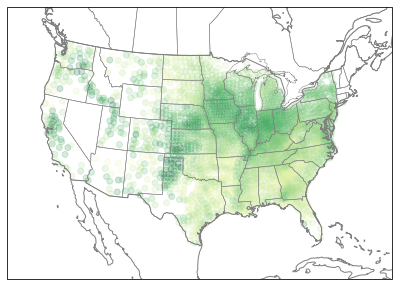

In [24]:
from palettable.colorbrewer.sequential import YlGn_8
years = list(np.arange(1961,2006))

fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1,1,1, projection=ccrs.AlbersEqualArea(
                     central_latitude=39.5, central_longitude=-98.35))
ax.set_extent([-123,-72,19,53])
ax.scatter(test.lon, test.lat, 
           transform=ccrs.PlateCarree(),
#           s=test.area/300, 
           c=test['yield'],
           cmap=YlGn_8.mpl_colormap, vmin=0, vmax=10, alpha=0.2)
ax.add_feature(cfeature.BORDERS, edgecolor='grey')
ax.add_feature(cfeature.COASTLINE, edgecolor='grey')
ax.add_feature(cfeature.STATES, edgecolor='grey', linewidth=0.5)

fig.subplots_adjust(wspace=0.1, hspace=-0.8)

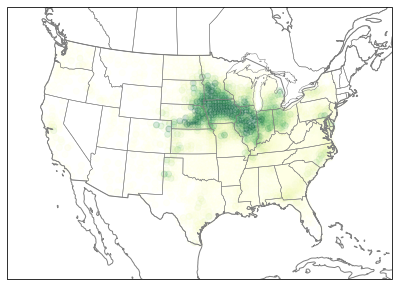

In [149]:
from palettable.colorbrewer.sequential import YlGn_8
years = list(np.arange(1961,2006))

fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1,1,1, projection=ccrs.AlbersEqualArea(
                     central_latitude=39.5, central_longitude=-98.35))
ax.set_extent([-123,-72,19,53])
ax.scatter(test.lon, test.lat, 
           transform=ccrs.PlateCarree(),
#           s=test.area/300, 
           c=test.area,
           cmap=YlGn_8.mpl_colormap, vmin=1000, vmax=50000, alpha=0.2)
ax.add_feature(cfeature.BORDERS, edgecolor='grey')
ax.add_feature(cfeature.COASTLINE, edgecolor='grey')
ax.add_feature(cfeature.STATES, edgecolor='grey', linewidth=0.5)

fig.subplots_adjust(wspace=0.1, hspace=-0.8)

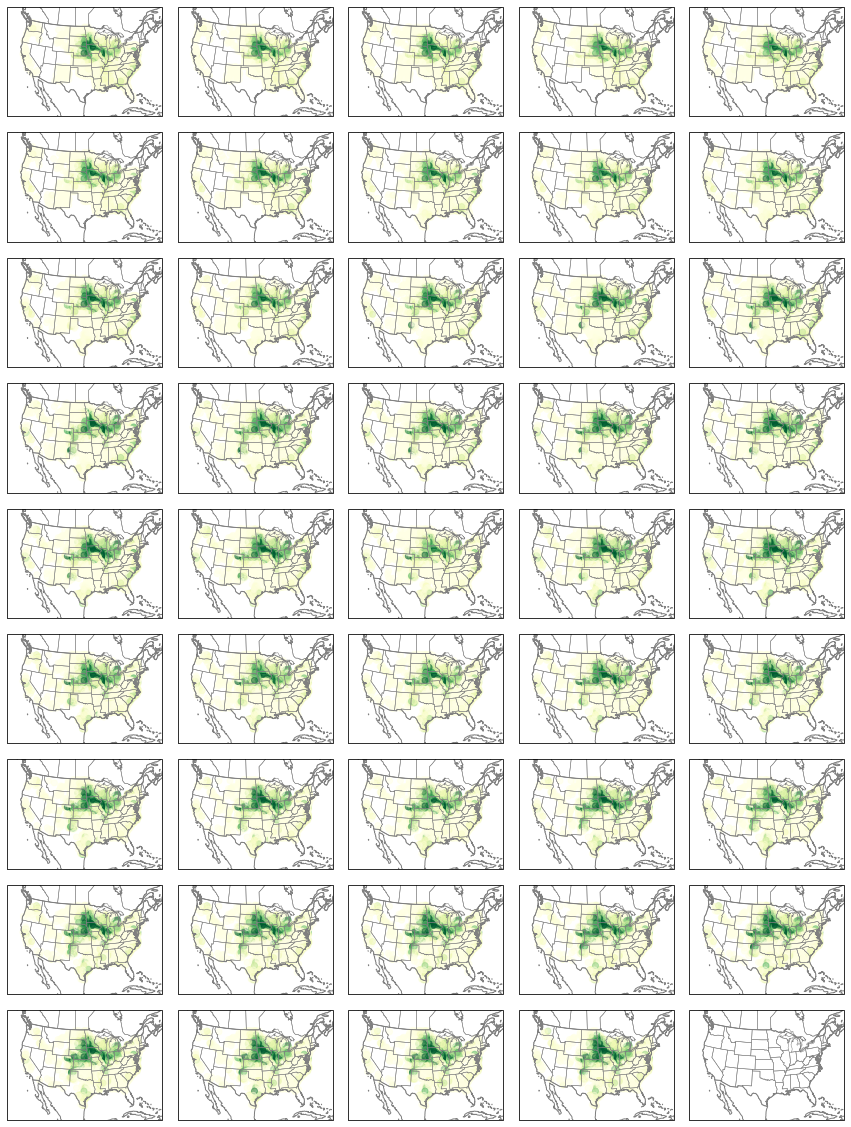

In [150]:
from palettable.colorbrewer.sequential import YlGn_8
years = list(np.arange(1961,2006))

fig = plt.figure(figsize=(15,30))
for i in np.arange(45):
    ax = fig.add_subplot(9,5,i+1, projection=ccrs.AlbersEqualArea(
                         central_latitude=39.5, central_longitude=-98.35))
    ax.set_extent([-123,-72,19,53])
    df_year = df_nass[df_nass.year == years[i]]
    ax.scatter(df_year.lon, df_year.lat, 
               transform=ccrs.PlateCarree(),
#               s=df_year.area/200, 
               c=df_year.area,
               cmap=YlGn_8.mpl_colormap, vmin=1000, vmax=50000, alpha=0.5)
    ax.add_feature(cfeature.BORDERS, edgecolor='grey')
    ax.add_feature(cfeature.COASTLINE, edgecolor='grey')
    ax.add_feature(cfeature.STATES, edgecolor='grey', linewidth=0.5)

fig.subplots_adjust(wspace=0.1, hspace=-0.8)